<a href="https://colab.research.google.com/github/mrchapagain/SocialNetworkAnalytics/blob/main/TwiteerDataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tweeter Data Analytics

***Here I will cover:***
1. *Tweets from twetter user*
2. *Tweets # search by keywords*

***Libaries***

In [160]:
# Necessary libaries
from tweepy import OAuthHandler
from tweepy import API
import tweepy
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import time

***Tweepy authentication***

In [159]:
# Load the data
from google.colab import files
uploaded= files.upload()
#Get the data

Saving config.ipynb to config.ipynb


In [341]:
#read configs, #import configparser, #config= configparser.ConfigParser(), #config.read('/content/sample_data/config.ipynb')
#Necessary information form tweet account


auth = OAuthHandler(consumer_key, consumer_secret) # Consumer key authentication
auth.set_access_token(access_token, access_token_secret) # Access key authentication
api = API(auth)  # Set up the API with the authentication handler
api.me().screen_name  # just check if it is working

'mrchapagain'

#1. Tweets from user

***Creating variable to navigate twetter***

In [111]:
# Obtaining tweet from specific user account
def tweets_by_user(user):
  limit=300

  tweets_obj= tweepy.Cursor(api.user_timeline, screen_name=user, count=200, tweet_mode="extended").items(limit)
  
  # Create Data Frame
  columns= ['Tweets', 'Likes', 'Time', 'User']
  tweets = []
  for i in tweets_obj:
    tweets.append([i.full_text, i.favorite_count, i.created_at, i.user.screen_name])

  df= pd.DataFrame(tweets, columns=columns)
  df['Time']=df['Time'].apply(lambda x: x.strftime('%Y-%m-%d'))
  return df
  

In [292]:
df=tweets_by_user("DRNyheder")
#now lets make only tweets thats has not Re-Tweeted!
df_user_tweet= df[~df.Tweets.str.contains("RT")].set_index('Tweets')
df_user_tweet.head()

,Likes,Time,User
Tweets,,,
Flere personer er ramt af skud i Field's på Amager https://t.co/RnRnEULF4V https://t.co/LlmrQmIBQC,3,2022-07-03,DRNyheder
Anmeldelse om skyderi ved shoppingcenteret Field's https://t.co/7hlTyG2Kjs https://t.co/dcZqK8uQnk,7,2022-07-03,DRNyheder
"Seneste nyt fra Ukraine: Rusland siger, de har kontrol med hele Luhansk-regionen https://t.co/YgM51Q6o29 https://t.co/FwSoRi14iJ",3,2022-07-03,DRNyheder
ANALYSE To Mitch McConnell-tacklinger har banet vejen for USA's mest konservative højesteret https://t.co/D1lLUNB3ub https://t.co/ABqsZxGlNR,4,2022-07-03,DRNyheder
Rusland har fået kontrol over strategisk vigtig by: 'Russerne har opnået et delmål' https://t.co/6lHNIJaTmJ https://t.co/K1dQu9uuiy,2,2022-07-03,DRNyheder


In [291]:
# Top most liked tweets
mostlike= df_user_tweet.loc[df_user_tweet.Likes.nlargest(10).index]
mostlike.head()

,Likes,Time,User
Tweets,,,
Støttepartier tøver med at lade uvildige advokater vurdere minkrapport: 'Kan bedst betegnes som hykleri' https://t.co/Ry9EjxqRvm https://t.co/JAB32AD4Zn,90,2022-06-29,DRNyheder
Radikalt bagland presser partitop: Advokater skal vurdere om Mette Frederiksen skal for rigsret https://t.co/EUBhvTgKE1 https://t.co/2NjjCvg8YA,72,2022-07-01,DRNyheder
"Inflationen brager løs - og Danmark er blandt de europæiske lande, der hjælper befolkningen mindst https://t.co/KOByf8Xc7k https://t.co/WzASaWeGfX",62,2022-06-19,DRNyheder
Uffe Ellemann-Jensen er død https://t.co/X7ddZjEuiR https://t.co/q7RDaXhT1W,54,2022-06-19,DRNyheder
Seneste nyt fra Ukraine: Zelenskyj vil have Rusland ud af FN's Sikkerhedsråd https://t.co/rgKyeBaJIk https://t.co/mjdnFSXxji,51,2022-06-29,DRNyheder


***Plot the word-colud***

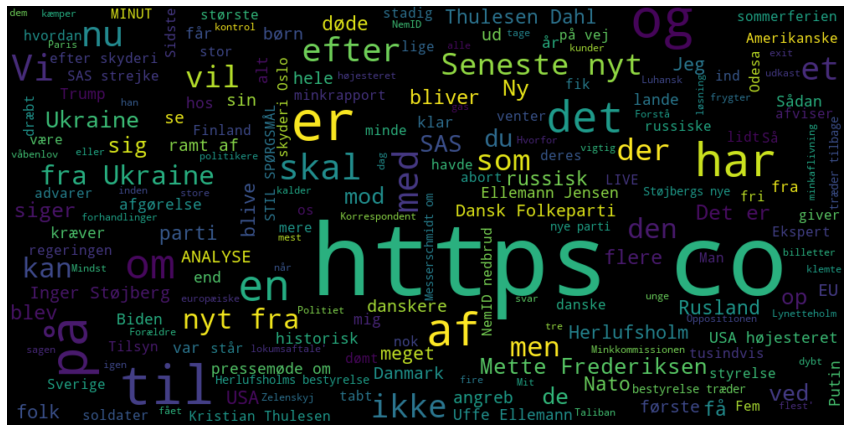

In [296]:
#Plot the word cloud
from wordcloud import WordCloud 
allWords= ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width= 1000, height=500, random_state=21, max_font_size= 119).generate(allWords)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

***Sentiment Analysis***

In [327]:
# Create a function to compute Negetive, Neutral and Positive analysis
import re
from textblob import TextBlob
def SentimentAnalysis(df):
  # first clean the text
  text= df['Tweets']

  def cleanText(text):
    text= re.sub(r'@[A-Za-z0-9]+', '',text) # Removed @mentions
    text= re.sub(r'#', '',text) # the '#' symbol
    text= re.sub(r':', '',text) # the ':' symbol
    text= re.sub(r'RT[\s]+', '',text) # Removed RT
    text= re.sub(r'https?:\/\/\s+', '',text) # Removed the hyper link
    return text

  #clean tweets
  df['Tweets']= df['Tweets'].apply(cleanText)

  #function to get the subjectivity
  def getSubjectivity(text=df['Tweets']):
    return TextBlob(text).sentiment.subjectivity
  #function to ge the polarity
  def getPolarity(text=df['Tweets']):
    return TextBlob(text).sentiment.polarity
  #Create to new columns
  df['Subjectivity']= df['Tweets'].apply(getSubjectivity)
  df['Polarity']= df['Tweets'].apply(getPolarity)

  # Function to sentiment
  def getAnalysis(score):
    if score < 0: return 'Negetive'
    elif score == 0: return 'Neutral'
    else: return 'Positive'

  df['Analysis']= df['Polarity'].apply(getAnalysis)
  #show the data

  return df

In [335]:
df_sentiment=SentimentAnalysis(df).set_index("Tweets")
df_sentiment[['Likes', 'Time', 'Analysis']].head()

,Likes,Time,Analysis
Tweets,,,
Flere personer er ramt af skud i Field's på Amager https//t.co/RnRnEULF4V https//t.co/LlmrQmIBQC,3,2022-07-03,Neutral
Anmeldelse om skyderi ved shoppingcenteret Field's https//t.co/7hlTyG2Kjs https//t.co/dcZqK8uQnk,7,2022-07-03,Neutral
"Seneste nyt fra Ukraine Rusland siger, de har kontrol med hele Luhansk-regionen https//t.co/YgM51Q6o29 https//t.co/FwSoRi14iJ",3,2022-07-03,Neutral
ANALYSE To Mitch McConnell-tacklinger har banet vejen for USA's mest konservative højesteret https//t.co/D1lLUNB3ub https//t.co/ABqsZxGlNR,4,2022-07-03,Neutral
Rusland har fået kontrol over strategisk vigtig by 'Russerne har opnået et delmål' https//t.co/6lHNIJaTmJ https//t.co/K1dQu9uuiy,2,2022-07-03,Neutral


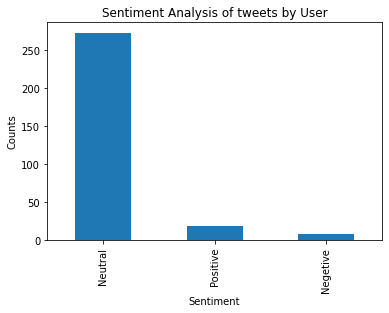

In [338]:
# Plot and visualize the counts
plt.title('Sentiment Analysis of tweets by {}'.format(df.columns[3]))
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()


#2.  Tweets search by using Keywords or Hashtag

In [339]:
# Obtaining tweet using keywords or Hastag
def tweets_by_keywords(keywords):
  limit=300

  tweets_obj= tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode="extended").items(limit)
    # Create Data Frame
  columns= ['Tweets', 'Time', 'User']
  tweets = []
  for i in tweets_obj:
    tweets.append([i.full_text, i.created_at, i.user.screen_name])

  df= pd.DataFrame(tweets, columns=columns)
  df['Time']=df['Time'].apply(lambda x: x.strftime('%Y-%m-%d'))
  return df


In [342]:
keywords=input('Type the word you want to search tweet by: ')
df_keywords= tweets_by_keywords(keywords)
SentimentAnalysis(df_keywords)[['Tweets',	'Time',	'User','Analysis']].set_index('Tweets').head()

Type the word you want to search tweet by: Health


,Time,User,Analysis
Tweets,,,
"The Ohio law does make an exception for the mother's health, so I don't see why she didn't qualify. There is probably much more to the story than what we read in this piece, which is 10% fact and 90% politics. Like most things these days.",2022-07-03,galaxy999ca,Positive
"_Oilllll Like I said, mental health, physical health, permanent bodily damages, financial issues, possible homelessness, and more I cannot think of immediately. These can all end up in the loss of life of the person carrying the pregnancy. Its not a simple issue.",2022-07-03,kway_chan,Positive
"""Women must be able to make their own health care decisions."" -Sen. Raphael Warnock\n\nUpbringing &amp; experience w a cong…",2022-07-03,CherylBlueWave,Positive
_2 Why doesn't sign an executive order to declare a national emergency and use federal lands for abortions? Forcing…,2022-07-03,JaxHarley5,Neutral
Y'all pls pray for Ahmed's health.,2022-07-03,ihirarafique,Neutral


# Visualization with text processing

In [122]:
# Libaries for sentiment analytics (NLP)
import matplotlib.pyplot as plt
import re
import spacy
import seaborn as sns

In [123]:
import spacy.cli
spacy.cli.download("en_core_web_lg")
nlp = spacy.load('en_core_web_lg')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [343]:
# Split all the sentances and creat the list of sentence of from the tweet columns
list_of_sentences = [sentence for sentence in df.Tweets]

lines = []
for sentence in list_of_sentences:
  words = sentence.split()
  for w in words:
    lines.append(w)
print(lines[:20])

['Flere', 'personer', 'er', 'ramt', 'af', 'skud', 'i', "Field's", 'på', 'Amager', 'https//t.co/RnRnEULF4V', 'https//t.co/LlmrQmIBQC', 'Anmeldelse', 'om', 'skyderi', 'ved', 'shoppingcenteret', "Field's", 'https//t.co/7hlTyG2Kjs', 'https//t.co/dcZqK8uQnk']


In [344]:
# Removing Punctuation by using Regular Expression (RegEx)
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines2= []

for word in lines:
  if word != '':
    lines2.append(word)

In [345]:
# Stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language='english')

stem= []
for word in lines2:
  stem.append(s_stemmer.stem(word))

In [346]:
# Removing all the stop words
stem2= []

for word in stem:
  if word not in nlp.Defaults.stop_words:
    stem2.append(word)

In [347]:
df2 = pd.DataFrame(stem2)
df2 = df2[0].value_counts()
df2.head()

er     78
og     65
til    64
p      63
af     50
Name: 0, dtype: int64

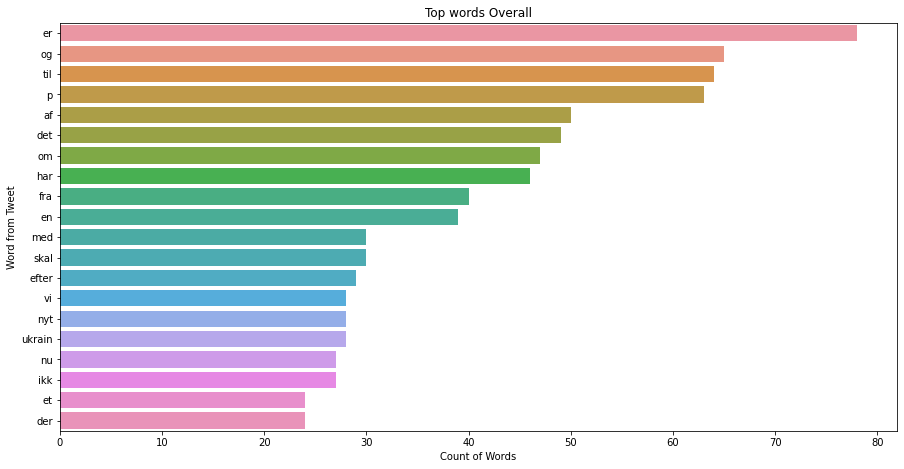

In [348]:
# Visualization
df2= df2[:20,]
plt.figure(figsize=(15,7.5))
sns.barplot(df2.values, df2.index, alpha=1)
plt.title('Top words Overall')
plt.ylabel('Word from Tweet')
plt.xlabel('Count of Words')
plt.show()

In [349]:
# Visualization for mentions organizations
def show_ents(doc):
  if doc.ents:
    for ent in doc.ents:
      print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [350]:
str1 = " "
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])
df7 = df6.where(df6['Entity'] == 'ORG')
df7 = df7['Word'].value_counts()

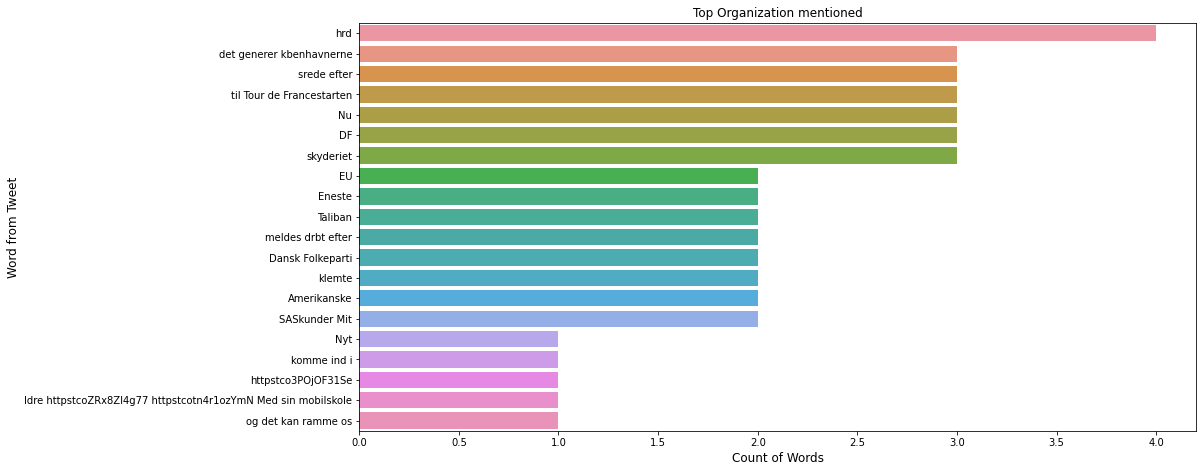

In [351]:
# Visualization again
dfx= df7[:20, ]
plt.figure(figsize=(15,7.5))
sns.barplot(dfx.values, dfx.index, alpha=1)
plt.title('Top Organization mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [352]:
str1 = " "
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])
df7 = df6.where(df6['Entity'] == 'PERSON')
df7 = df7['Word'].value_counts()

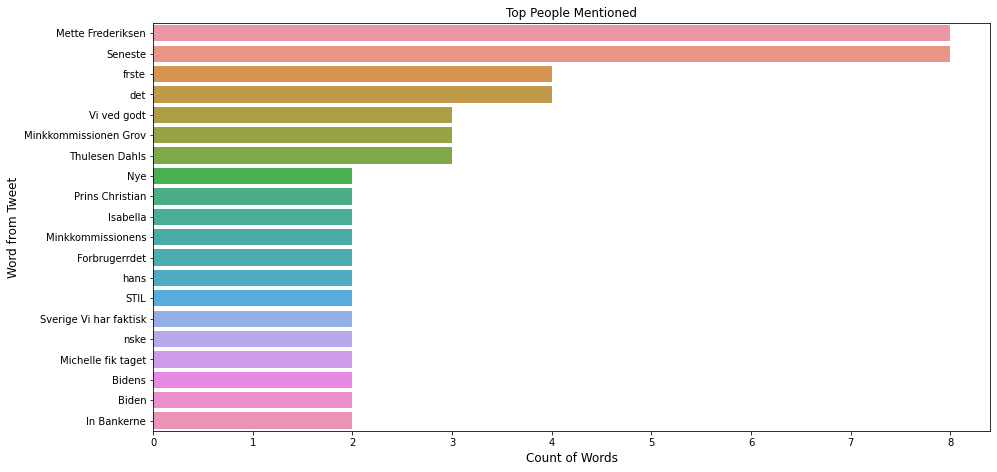

In [353]:
# Visualization again
dfx= df7[:20, ]
plt.figure(figsize=(15,7.5))
sns.barplot(dfx.values, dfx.index, alpha=1)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()